In [98]:
import pandas as pd
import numpy as np

from sklearn import tree

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score as auc
from IPython.display import Image
from sklearn.externals.six import StringIO 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pydot
import urllib

In [99]:
raw_data = urllib.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric")
credit = np.loadtxt(raw_data)
labels = credit[:,24]
X,y = credit[:,:-1], credit[:,-1:].squeeze() 
lbl_enc = LabelEncoder()
labels = lbl_enc.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.2, random_state=1)

In [100]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
print ("AUC: " + str(auc(y_test, clf.predict(X_test))))

AUC: 0.702848900108


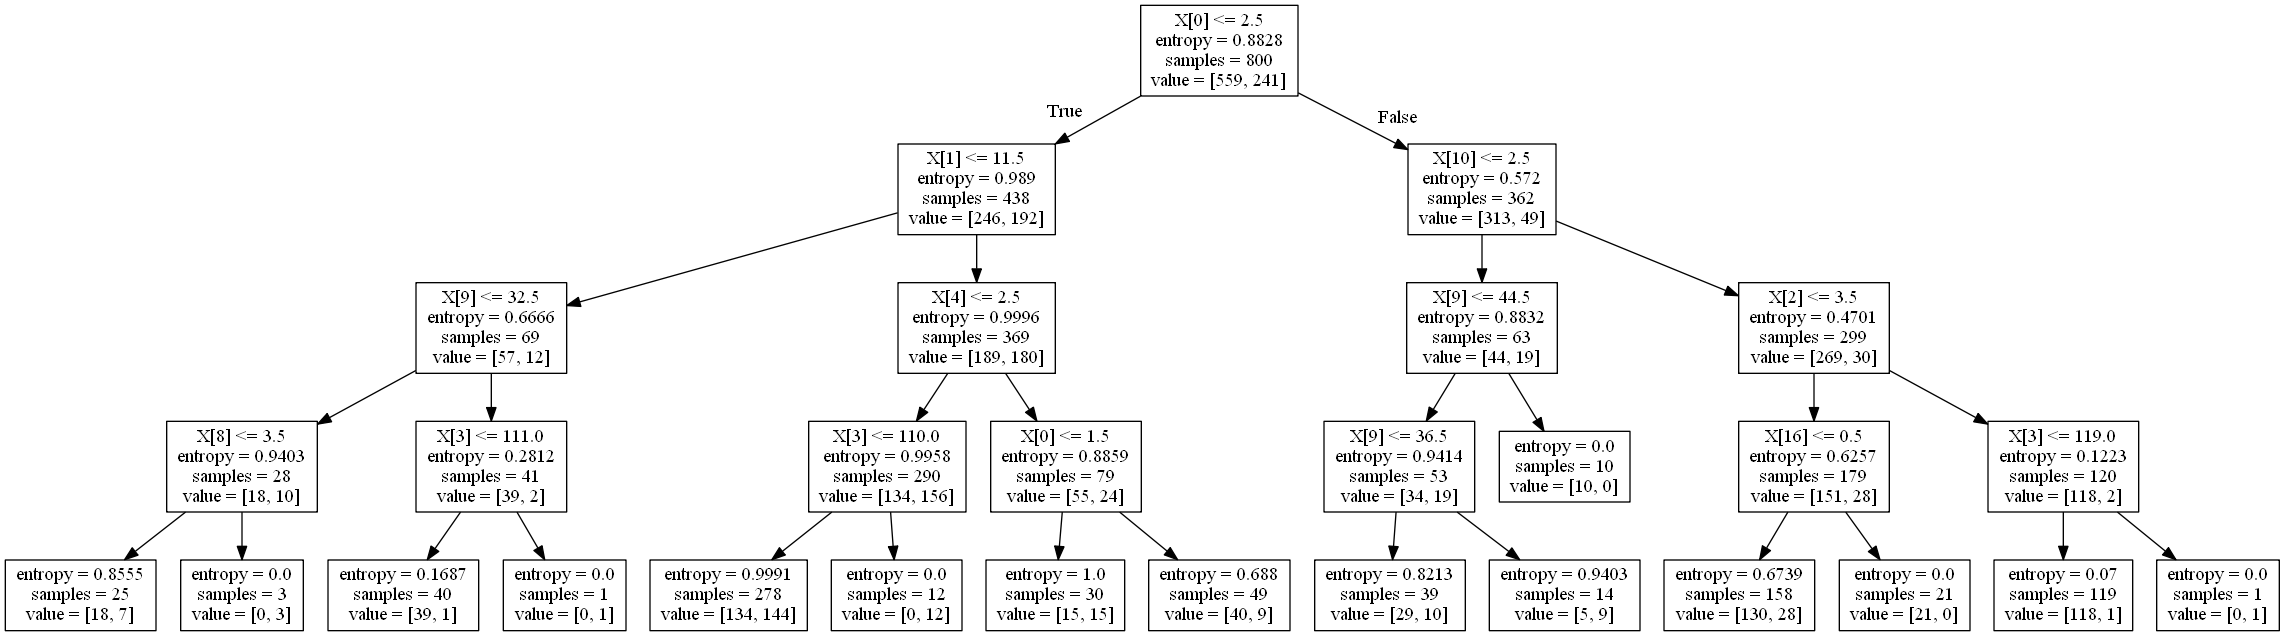

In [101]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Сначало дерево поделилось по нулевому признаку - текущее состояние счета в банке.  Наличие денег на счете играет, очевидно, большую роль.
На втором уровне разделение идет по длительности кредита, очевидное разделение на краткосрочные и долгорочные кредиты.  Второй признак на втором уровне- время, которое человек живет в указанном месте, наверное тоже логично в зависимости от этого у банка будет иметься или отсутствовать информация о клиенте.

 Меняем критерий - качество незначительно уменьшилось

In [102]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(X_train, y_train)
print ("AUC: " + str(auc(y_test, clf.predict(X_test))))

AUC: 0.699302800817


Меняем глубину дерева - при уменьшении глубины дерева наблюдается недообучение. при увеличении - качество растет

In [103]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(X_train, y_train)
print ("AUC: " + str(auc(y_test, clf.predict(X_test))))

AUC: 0.61828344753


In [104]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20)
clf.fit(X_train, y_train)
print ("AUC: " + str(auc(y_test, clf.predict(X_test))))

AUC: 0.657891573506


In [105]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf.fit(X_train, y_train)
print ("AUC: " + str(auc(y_test, clf.predict(X_test))))

AUC: 0.5


Изучим изменения подробнее

In [106]:
auc_list_gini = []
auc_list_entropy = []
for i in range(1,25):
    auc_meaner = []
    for j in range(1,10):
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
        clf.fit(X_train, y_train)
        auc_meaner.append(auc(y_test, clf.predict(X_test)))
    auc_list_entropy.append(np.mean(auc_meaner))
    
    auc_meaner = []
    for j in range(1,10):
        clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
        clf.fit(X_train, y_train)
        auc_meaner.append(auc(y_test, clf.predict(X_test)))
    auc_list_gini.append(np.mean(auc_meaner))

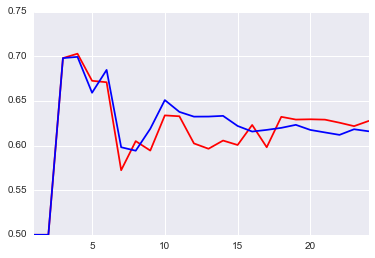

In [107]:
pd.Series(index=range(1,25), data=auc_list_entropy).plot(color='r')
pd.Series(index=range(1,25), data=auc_list_gini).plot(color='b')

По оси Х - глубина деревьев, по Y - AUC-ROC. Красный цвет - энтропийный критерий, синий - критерий Gini. Заметим, что дерево перестает расти в зависимости от глубины.

Меняем обучающую выборку

In [108]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,labels,test_size=0.2)
auc_meaner = []
for j in range(1,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
    clf.fit(X_train_new, y_train_new)
    auc_meaner.append(auc(y_test, clf.predict(X_test)))
print ("AUC: " + str(np.mean(auc_meaner)))

AUC: 0.819123629485


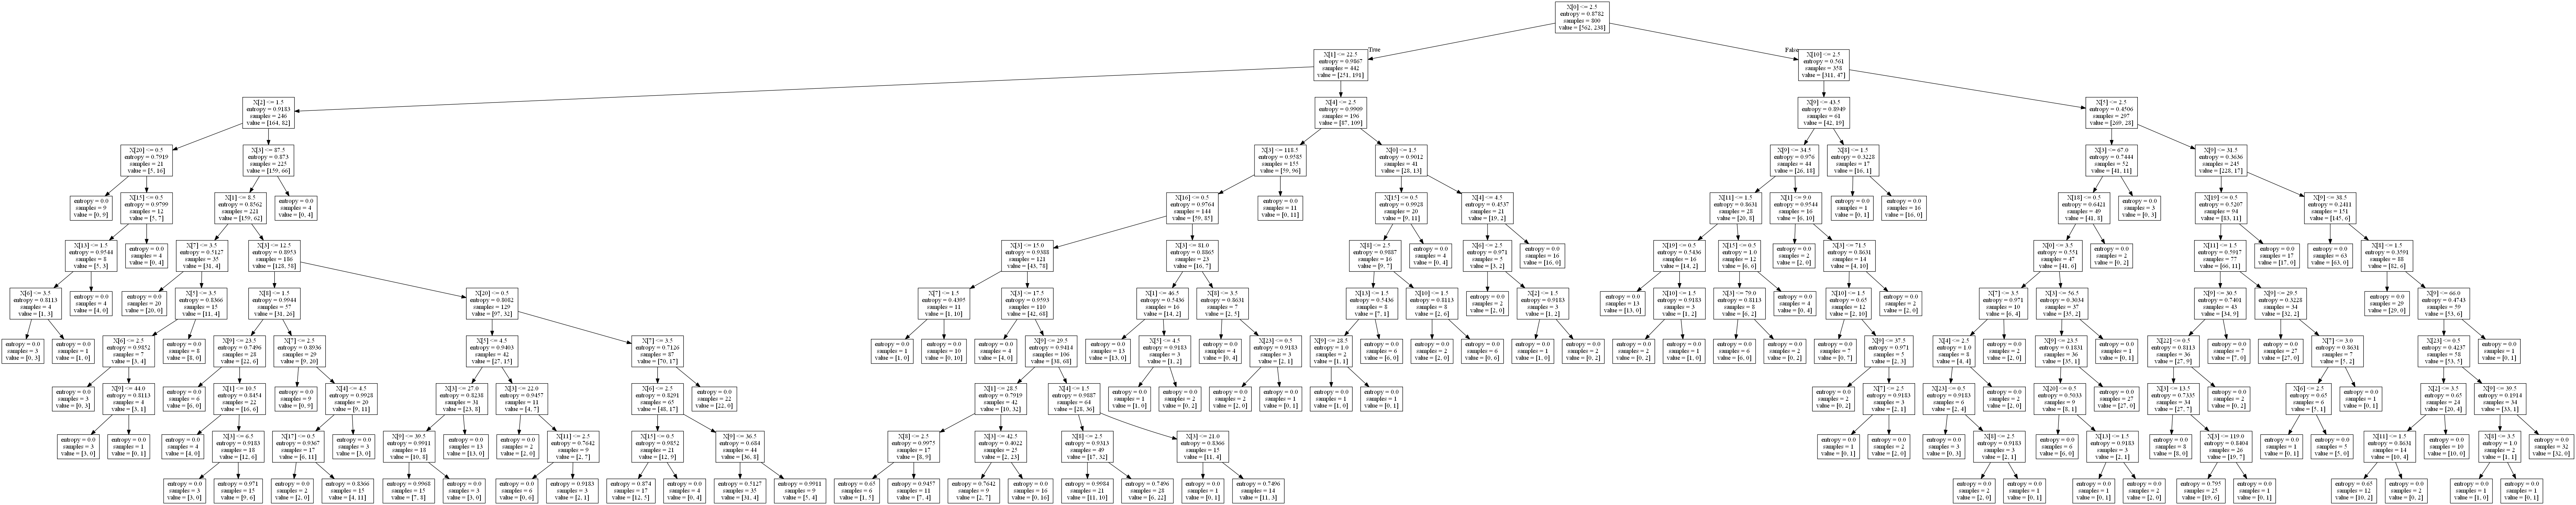

In [109]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [110]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,labels,test_size=0.2)
auc_meaner = []
for j in range(1,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
    clf.fit(X_train_new, y_train_new)
    auc_meaner.append(auc(y_test, clf.predict(X_test)))
print ("AUC: " + str(np.mean(auc_meaner)))

AUC: 0.840523595321


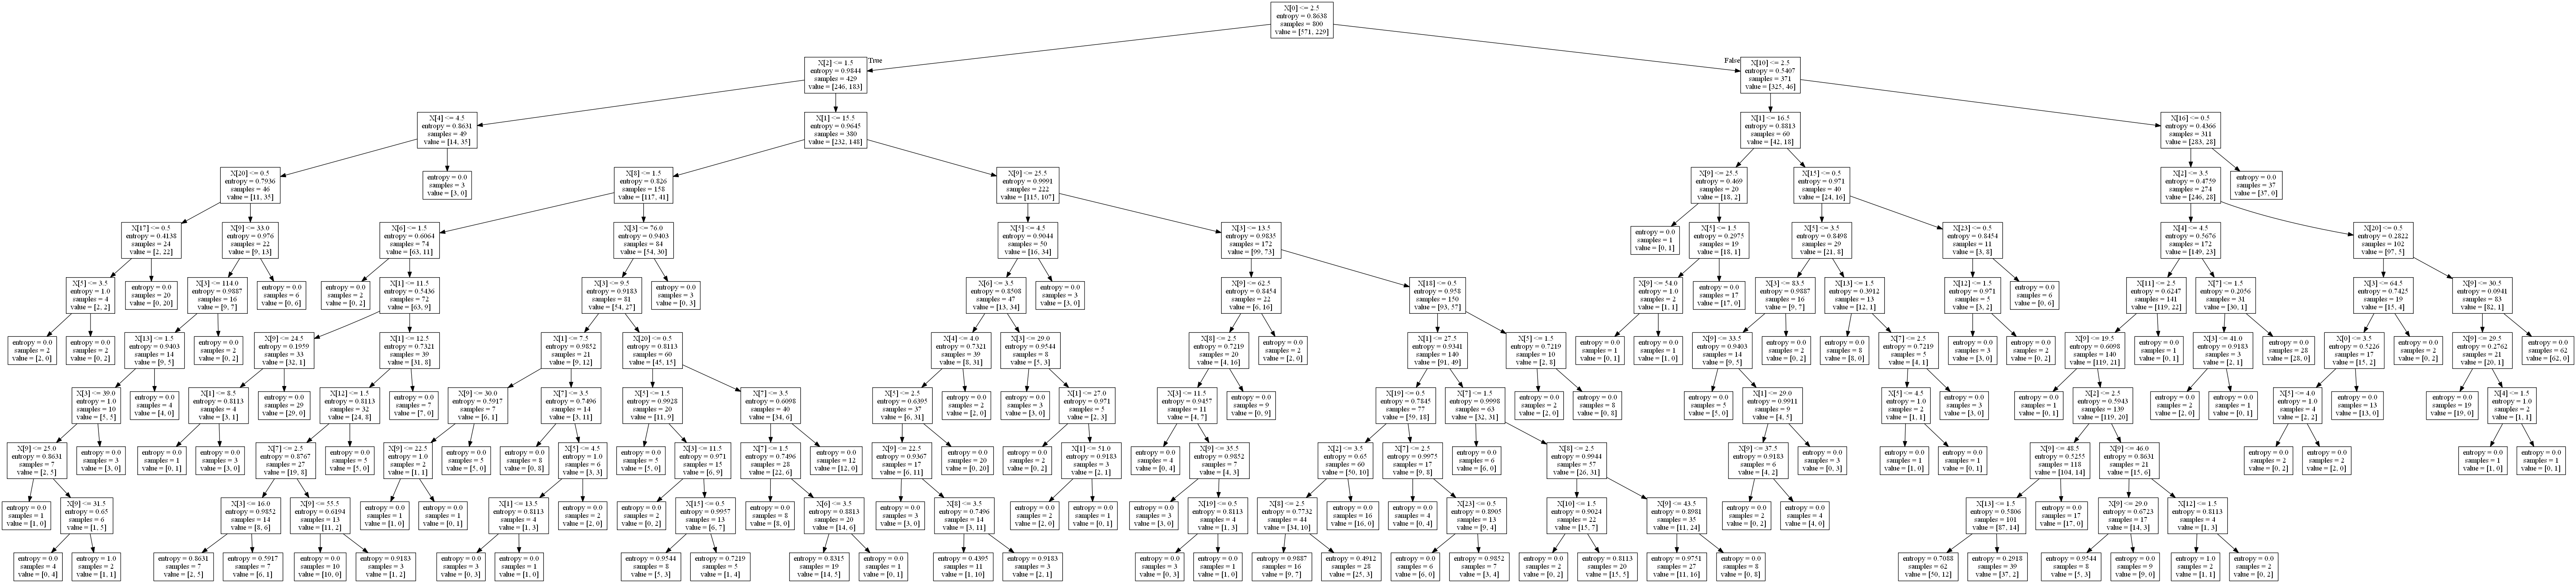

In [111]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [112]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,labels,test_size=0.2)
auc_meaner = []
for j in range(1,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
    clf.fit(X_train_new, y_train_new)
    auc_meaner.append(auc(y_test, clf.predict(X_test)))
print ("AUC: " + str(np.mean(auc_meaner)))

AUC: 0.906956807815


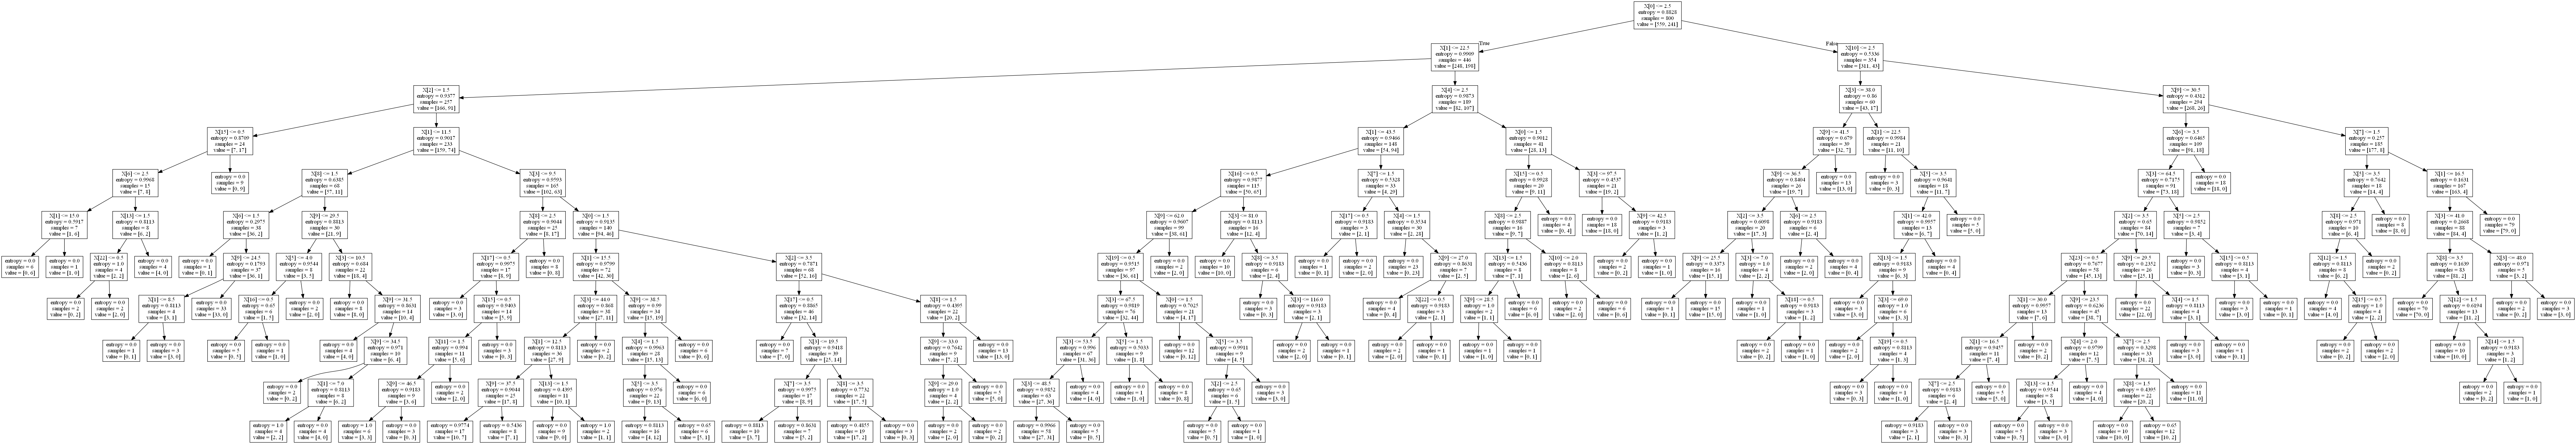

In [113]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Графы наглядно показывают, что деревья отличаются друг от друга по структуре при разных обучающих выборках и фиксированных тестовой выборке и глубине. В зависимости от обучающей выборки меняется качество, поэтому и разная структура.